# Improving rating results through consensus

### Problem

Given a single rater has a 0.6 accuracy.
Using majority consensus rating, how many raters are required to reach an accuracy >= 0.9?

## Simulation

In [52]:
import random
from collections import defaultdict
from collections import Counter

base_accurancy = 0.6

def rater(value):
    return value if random.random() < base_accurancy else not value

def simulate(iterations, nr_raters):
    correct_total = 0

    for c in range(iterations):
        value = random.choice([True,False])
        ratings = []
        for r in range(nr_raters):
            ratings.append(rater(value))
        rating = Counter(ratings).most_common()[0][0]
        correct = not(value ^ rating)
        if correct:
            correct_total += 1
        #print(value, ratings, rating, correct)
    return correct_total

iterations = 10000

sdata = []
for r in range(1, 100, 1):
    exp = (r, simulate(iterations, r)/float(iterations))
    sdata.append(exp)

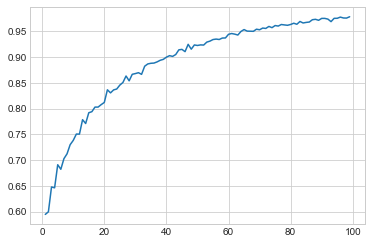

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()

xy_s = list(zip(*sdata))

ax.plot(x, y, ':b');

plot(list(sdata))

## Calculation

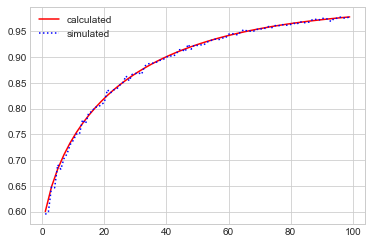

In [76]:
import math
from scipy.special import comb

def accuracy_consensus(rater_acc, nr_raters):
    acc = 0
    nr_consensus = math.ceil(nr_raters/2.0) # for simplicity, assume odd nr of raters
    for i in range(nr_raters, nr_consensus-1, -1):
        p1 = math.pow(rater_acc, i)
        p2 = math.pow(1 - rater_acc, nr_raters-i)
        c = comb(nr_raters, nr_raters-i, exact=True)
        acc += c * p1 * p2
    return acc

cdata = []
for r in range(1, 100, 2):
    calc = (r, accuracy_consensus(0.6, r))
    cdata.append(calc)
    
# combined plot
xy_c = list(zip(*cdata))

fig = plt.figure()
ax = plt.axes()
ax.plot(xy_c[0], xy_c[1], 'r', label='calculated')
ax.plot(xy_s[0], xy_s[1], ':b', label='simulated')
l = plt.legend()